# Boston and Seattle AirBNB Data Science Case Study

***This analysis follow the Cross-Industry Standard Process for Data Mining (CRISP-DM). This means it will follow the following steps interchangbly:***
* Business Understanding.
* Data Understanding.
* Data Preparation. 
* Modelling. 
* Evaluation.
* Deployment
---
Let's start with the first step, which is Understanding the main problem and asking the questions that mainly tackle the problem.

## Business Understanding
This dataset contains information and attributes of AirBNB listings. The listings are accompained with various features that can give us different insight about the AirBNB short-term rental business. However, we are mainly interested in the price to be our reponse variable. So that we will use the other features in relation with the price to answer the following questions:

1. What is the price average for the listed neighbourhoods indvidually ? Which neighbourhood has the maximum/minuimum price ?
1. Does the neighbourhood affects the listing price ?
1. Does the price fluctuates based on the month/ season of the year ? 
1. Do hosts with various/single listings tend to stabilize prices or change them frequently ?
1. What impact do the host attributes (superhost, acceptance rate, ..., etc) have on the price ?
1. What is the relationship between the property attributes and the price ?   

---

## Data Understanding 
In this section we will try to answer the questions using the data attributes and features. 
* What is the price average for the listed neighbourhoods indvidually ? Which neighbourhood has the maximum/minuimum price ?

**This question can be answered by grouping the dataframe by the neighbourhood and finding the average of the price for each neighbourhood.**
* Does the neighbourhood affects the listing price ?

**We will visualize the price average distribution with the neigbourhood, in order to find out a probable relationship between the price and neighbourhoods.**
* Does the price fluctuates based on the month/ season of the year ? 

**The listing dates will be formatted as datetime and new features (month, year, week days) will be added in order to find out the relationship.**

* Do hosts with various/single listings tend to stabilize prices or change them frequently ?

**we will need to access the 'host_listings_count' column and the price column to answer this question.**

* What impact do the host attributes (superhost, acceptance rate, ..., etc) have on the price ?

**we will compare some numerical columns that evaluates the host with the price column to see if they have an effect on the price. These columns are: 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost','review_scores_rating'.**

* What is the relationship between the property attributes and the price ?  

**we will compare some numerical columns that evaluates the property with the price column to see if they have an effect on the price. These columns are: 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities'.**
  
---
## Data Preparation 

Firstly, the main files of interest are the listings and calendars csvs. The dataset will go through the following process (new features can be created at any stage): 

1. Check for columns of interest according to the above mentioned questions and drop the other columns. 
1. Check for the missing values and deal with them based on each case indivdiually. (imputing/removing or creating new features out of them.)
1. Confirm or change the data type of each column as needed. 
1. Check for duplicated home IDs. 
1. Create new dataframes to answer each question individually using visualization and statistical analysis. 
1. Merge datasets and adapt categorical/string columns for data modelling (machine learning prediction of the price). 


In [1]:
# Import nessecary packages and libararies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re
import seaborn as sns
import sklearn as sk
from    VizTools import VizTool
from HelperFunc import HelperFunction
%matplotlib inline
# Intialize instances from needed classes
# Intitialize an instance from the visualization class 
visualize = VizTool ()
# Intitialize an instance from the HelperFunction class 
helper = HelperFunction()


### Import Dataset

In [2]:
# Load Boston Datasets
boston_listing = pd.read_csv('BostonAirBNB/BostonListings.csv')
boston_calendar = pd.read_csv('BostonAirBNB/BostonCalendar.csv')

#### Step 1: Check for columns of interest according to the above mentioned questions and drop the other columns

In [3]:
unused_features = ['listing_url','scrape_id', 'name','summary' 
,'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes'
,'transit','access', 'interaction', 'house_rules','thumbnail_url', 'medium_url'
,'picture_url','xl_picture_url', 'host_id','host_url','host_name'
,'host_location','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood'
,'host_listings_count','host_verifications','host_has_profile_pic','host_identity_verified'
,'street','neighbourhood','neighbourhood_group_cleansed','city','state','zipcode','market'
,'smart_location','country_code','country','latitude','longitude','is_location_exact'
,'square_feet','weekly_price','monthly_price','security_deposit','cleaning_fee'
,'guests_included','extra_people','minimum_nights','maximum_nights', 'calendar_updated'
,'has_availability','availability_30','availability_60','availability_90'
,'calendar_last_scraped','number_of_reviews','first_review','last_review','review_scores_accuracy'
,'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication'
,'review_scores_location','review_scores_value','requires_license', 'license','jurisdiction_names'
,'instant_bookable','cancellation_policy','require_guest_profile_picture','require_guest_phone_verification'
,'calculated_host_listings_count'] 

In [5]:
listing_filtered = helper.desired_features(boston_listing, unused_features)
listing_filtered.head()

,id,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,...,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,availability_365,review_scores_rating,reviews_per_month
0,12147973,2016-09-07,2015-04-15,NaN,NaN,NaN,f,1,Roslindale,House,...,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,NaN,NaN
1,3075044,2016-09-07,2012-06-07,within an hour,100%,100%,f,1,Roslindale,Apartment,...,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,359,94.0,1.30
2,6976,2016-09-07,2009-05-11,within a few hours,100%,88%,t,1,Roslindale,Apartment,...,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,319,98.0,0.47
3,1436513,2016-09-07,2013-04-21,within a few hours,100%,50%,f,1,Roslindale,House,...,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,98,100.0,1.00
4,7651065,2016-09-07,2014-05-11,within an hour,100%,100%,t,1,Roslindale,House,...,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,334,99.0,2.25


Now with the calendar dataset

In [4]:
# Remove all the unavailable listings
calendar_filtered = boston_calendar[boston_calendar.available == 't'].drop(columns = ['available'])

#### Step 2: Confirm or change the data type of each column as needed.

Let's start with the calendar data. 

In [6]:
# check data types
boston_calendar.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [7]:
# Change date column to datetime format
calendar_filtered.date = pd.to_datetime(calendar_filtered.date)

In [8]:
# Create new features and drop date column
calendar_filtered['year'] = pd.DatetimeIndex(calendar_filtered['date']).year
calendar_filtered['month'] = pd.DatetimeIndex(calendar_filtered['date']).month
calendar_filtered['weekday'] = pd.DatetimeIndex(calendar_filtered['date']).weekday
calendar_filtered['weekday'] = calendar_filtered.weekday.apply(lambda z : helper.weekday(z))

In [9]:
# Fix the price data type from string to float
calendar_filtered.price = calendar_filtered.price.apply(lambda x: int(helper.fix_price(x)))


In [10]:
# Check again for the data types after adjustments
calendar_filtered.dtypes

listing_id             int64
date          datetime64[ns]
price                  int64
year                   int64
month                  int64
weekday               object
dtype: object

Let's repeat the same process but with the listing dataset. 

In [11]:
listing_filtered.dtypes

id                             int64
last_scraped                  object
host_since                    object
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_is_superhost             object
host_total_listings_count      int64
neighbourhood_cleansed        object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
amenities                     object
price                         object
availability_365               int64
review_scores_rating         float64
reviews_per_month            float64
dtype: object

In [12]:
listing_filtered.head()

,id,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,...,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,availability_365,review_scores_rating,reviews_per_month
0,12147973,2016-09-07,2015-04-15,NaN,NaN,NaN,f,1,Roslindale,House,...,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,0,NaN,NaN
1,3075044,2016-09-07,2012-06-07,within an hour,100%,100%,f,1,Roslindale,Apartment,...,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,359,94.0,1.30
2,6976,2016-09-07,2009-05-11,within a few hours,100%,88%,t,1,Roslindale,Apartment,...,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,319,98.0,0.47
3,1436513,2016-09-07,2013-04-21,within a few hours,100%,50%,f,1,Roslindale,House,...,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,98,100.0,1.00
4,7651065,2016-09-07,2014-05-11,within an hour,100%,100%,t,1,Roslindale,House,...,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,334,99.0,2.25


We see that these columns should be changed : 
- Price : string to float 
- host_response_time : string to categorical
- host_response_rate : string to int
- host_acceptannce_rate: string to int 
- host_is_superhost: string to boolean
- room_type: string to categorical
- bed_type: string to categorical


Now lets check the unique values for string to categorical columns:

In [13]:
# Host response time
print(listing_filtered.host_response_time.unique())

[nan 'within an hour' 'within a few hours' 'within a day'
 'a few days or more']


In [14]:
# Room type
print(listing_filtered.room_type.unique())

['Entire home/apt' 'Private room' 'Shared room']


In [15]:
# Bed type
print(listing_filtered.bed_type.unique())

['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']


#### Step 3: Check for the missing values and deal with them based on each case indivdiually. (imputing/removing or creating new features out of them.)
Let's start with the calendar data. 

In [16]:
# Check the missing values for the calendar data
calendar_filtered.isna().sum()

listing_id    0
date          0
price         0
year          0
month         0
weekday       0
dtype: int64

It looks clear that there is no missing values in the calendar dataset. Now let's analyze the missing values for the listing dataset.

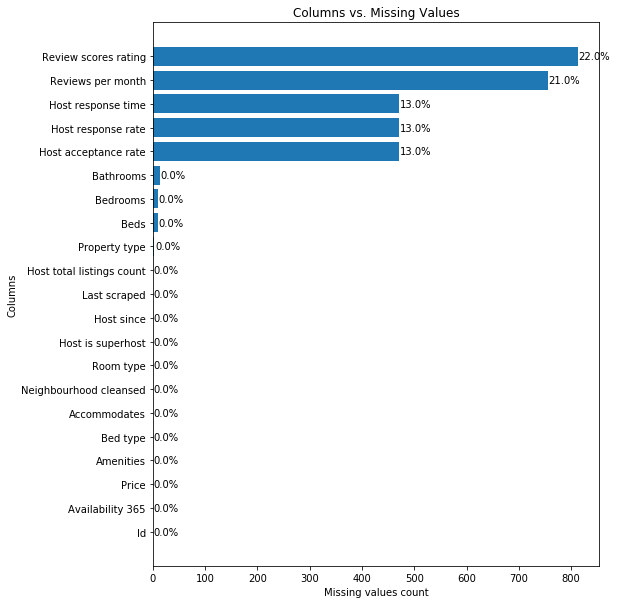

In [17]:
Y = listing_filtered.isna().sum().sort_values().reset_index()[0]
X = listing_filtered.isna().sum().sort_values().reset_index()['index']
X = X.apply (lambda x : x.replace('_', ' '))
X = X.apply(lambda x : x.capitalize())
# plt.figure(figsize = [5,10]) 
# plt.barh(X,Y);
visualize.Plot_barhProp (X, Y,listing_filtered.shape[0],list(Y),'Missing values count','Columns','Columns vs. Missing Values',fig_size = [8,10],Rotation = None)

The figure above shows the missing values count and their percentages for each column relative to the total number of listings. The values in this dataset are unique for each listing. Therefore, they can not be imputed. However, we might get a better intuition of the listings with missing values, if we look at the distribution of the key features in our analysis. We will assess the days of availiability, the host total listings, and the price range. 

**Feature one: How many days was the listing available for listings with missing values ?**

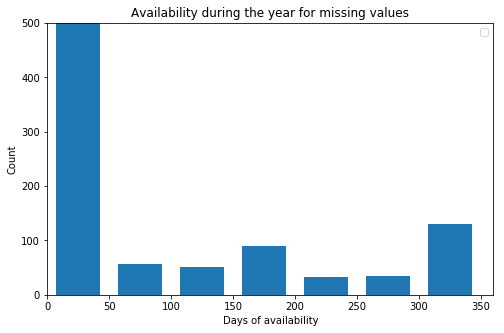

In [18]:
availability_missing = listing_filtered [listing_filtered.isnull().any(axis=1)].availability_365
visualize.Plot_Hist (availability_missing,axis = [0, 360, 0, 500],title = 'Availability during the year for missing values', xlabel = 'Days of availability', ylabel = 'Count', legend = None,minimum = 0, maximum = 365, step = 50, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

**Feature Two: How many listings does the host have for listings with missing values ?**

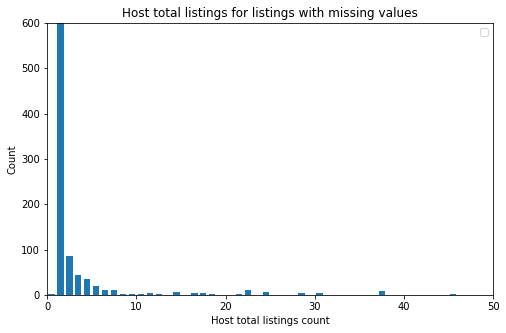

In [19]:
host_listings = listing_filtered [listing_filtered.isnull().any(axis=1)].host_total_listings_count
visualize.Plot_Hist (host_listings,axis = [0, 50, 0, 600],title = 'Host total listings for listings with missing values',
 xlabel = 'Host total listings count', ylabel = 'Count', legend = None,minimum = host_listings.min(),
  maximum = host_listings.max(), step = 1, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

**Feature Three: What are the price ranges for listings with missing values?**

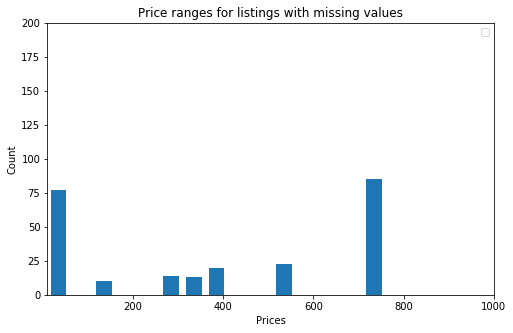

In [20]:
price_missing = listing_filtered [listing_filtered.isnull().any(axis=1)].price.apply(lambda x: int(helper.fix_price(x)))
price_max = price_missing.max()
price_min = price_missing.min()
visualize.Plot_Hist (host_listings,axis = [price_min, 1000, 0, 200],title = 'Price ranges for listings with missing values',
 xlabel = 'Prices', ylabel = 'Count', legend = None,minimum = price_min,
  maximum = price_max, step = 50, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

**Feature Four: How many years of host experience, does the owner of the listing have?**
- This will require reformulating the last_scraped and host_since columns to be date time format. They will form a new column called years_as_host, and they will be dropeed afterwards, except the new formed feature.

In [21]:
listing_filtered.last_scraped = pd.to_datetime(listing_filtered.last_scraped)
year_scraped = pd.DatetimeIndex(listing_filtered.last_scraped).year
listing_filtered.host_since = pd.to_datetime(listing_filtered.host_since)
year_host = pd.DatetimeIndex(listing_filtered.host_since).year
listing_filtered['years_as_host'] = year_scraped - year_host
listing_filtered = listing_filtered.drop(columns = ['last_scraped','host_since'])


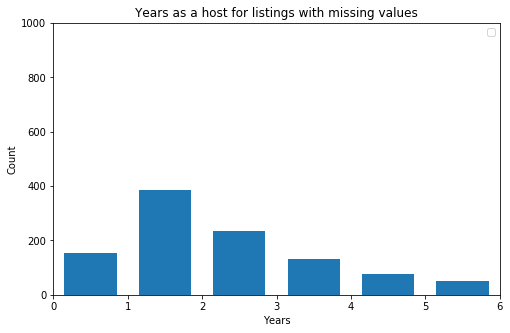

In [22]:
# Now lets visualize the years as a host column for missing values
years_host_miss = listing_filtered[listing_filtered.isnull().any(axis = 1)].years_as_host
visualize.Plot_Hist (years_host_miss,axis = [0, 6, 0, 1000],title = 'Years as a host for listings with missing values',
 xlabel = 'Years', ylabel = 'Count', legend = None,minimum = years_host_miss.min(),
  maximum = years_host_miss.max(), step = 1, fig_size = [8,5],r_width = 0.7,vis_x= True,vis_y = True,vis_legend = True)

***From the above shown graphs we can conclude that some of the missing value listings are for new hosts with 0 or less than 10 days availability over one whole year. However, there are higher percentage for other groups who can be experienced hosts with several listings. Therefore, the missing values will be dealt with on two stages. Firstly, we will remove missing values for only listings with less than 10 days availability, with host registered less than a year, and host has only one listing. However, the numeric columns with missing data higher than 10% will be dropped from the dataset, and the ones lower than 10% will be imputed in the data visualization phase, as we don't want to lose variability in the other columns. However, they will be visualized solely without missing values in comparison to the price. Yet, in the data modelling part, where machine learning will be used, the missing data rows will be all removed, as we want to see the effect of all features together on the price prediction without impurities.***   

For data visualization: remove missing values for group one as mentioned above, and drop columns with missing values:

In [23]:
availability_condition = listing_filtered.availability_365 <= 10
listing_condition  = listing_filtered.host_total_listings_count < 2
host_condition = listing_filtered.years_as_host <=1

listing_no_miss = listing_filtered[availability_condition & listing_condition & host_condition].dropna()
listing_no_group1 = listing_filtered[~((availability_condition) & (listing_condition) & (host_condition))]
listing_adjusted = pd.concat ([listing_no_miss,listing_no_group1]).sort_index()
listing_adjusted.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 1 to 3584
Data columns (total 20 columns):
id                           3382 non-null int64
host_response_time           3088 non-null object
host_response_rate           3088 non-null object
host_acceptance_rate         3088 non-null object
host_is_superhost            3382 non-null object
host_total_listings_count    3382 non-null int64
neighbourhood_cleansed       3382 non-null object
property_type                3380 non-null object
room_type                    3382 non-null object
accommodates                 3382 non-null int64
bathrooms                    3368 non-null float64
bedrooms                     3372 non-null float64
beds                         3374 non-null float64
bed_type                     3382 non-null object
amenities                    3382 non-null object
price                        3382 non-null object
availability_365             3382 non-null int64
review_scores_rating         2708 non-null f

Fill the columns with lower than 10% missing values

In [24]:
imputed_columns_condition = (listing_filtered.isna().mean() < 0.1) & (listing_filtered.isna().mean() > 0)
imputed_columns_series = imputed_columns_condition.reset_index()
imputed_columns = list(imputed_columns_series[imputed_columns_series[0] == True]['index'].values)

In [25]:
listing_adjusted[imputed_columns] = listing_adjusted[imputed_columns].fillna(0)
listing_no_missing = listing_adjusted.dropna(axis='columns')

In [26]:
listing_no_missing.head()

,id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,availability_365,years_as_host
1,3075044,f,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,359,4
2,6976,t,1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,319,7
3,1436513,f,1,Roslindale,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,98,3
4,7651065,t,1,Roslindale,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,334,2
5,12386020,t,2,Roslindale,Condominium,Private room,2,1.0,1.0,1.0,Real Bed,"{""Cable TV"",""Wireless Internet"",""Air Condition...",$75.00,58,0


In [27]:
listing_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 1 to 3584
Data columns (total 15 columns):
id                           3382 non-null int64
host_is_superhost            3382 non-null object
host_total_listings_count    3382 non-null int64
neighbourhood_cleansed       3382 non-null object
property_type                3382 non-null object
room_type                    3382 non-null object
accommodates                 3382 non-null int64
bathrooms                    3382 non-null float64
bedrooms                     3382 non-null float64
beds                         3382 non-null float64
bed_type                     3382 non-null object
amenities                    3382 non-null object
price                        3382 non-null object
availability_365             3382 non-null int64
years_as_host                3382 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 422.8+ KB
